In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
#import kmeans
from sklearn.cluster import KMeans


In [6]:
#Kết nối với Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
path = '/content/drive/MyDrive/Colab Notebooks/DataSales - Copy.csv'
dataframe = pd.read_csv(path)


In [8]:
dataframe[['Quantity Ordered', 'Price Each', 'Macbook Pro Laptop', 'LG Washing Machine', 'USB-C Charging Cable',
       'AA Batteries (4-pack)', 'Bose SoundSport Headphones',
       'AAA Batteries (4-pack)', 'ThinkPad Laptop', 'Google Phone',
       'Wired Headphones', 'Apple Airpods Headphones',
       'Lightning Charging Cable', 'Vareebadd Phone', '27in FHD Monitor',
       'iPhone', '20in Monitor', '34in Ultrawide Monitor',
       'Flatscreen TV', '27in 4K Gaming Monitor', 'LG Dryer']]

,Quantity Ordered,Price Each,Macbook Pro Laptop,LG Washing Machine,USB-C Charging Cable,AA Batteries (4-pack),Bose SoundSport Headphones,AAA Batteries (4-pack),ThinkPad Laptop,Google Phone,...,Apple Airpods Headphones,Lightning Charging Cable,Vareebadd Phone,27in FHD Monitor,iPhone,20in Monitor,34in Ultrawide Monitor,Flatscreen TV,27in 4K Gaming Monitor,LG Dryer
0,1.0,1700.00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,600.00,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,11.95,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,3.84,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,11.95,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185647,1.0,1700.00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
185648,1.0,149.99,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
185649,1.0,11.95,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
185650,1.0,11.95,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
dataframe['Quantity Ordered'].dtype

dtype('float64')

In [16]:
dataframe['Price Each'].dtype

dtype('float64')

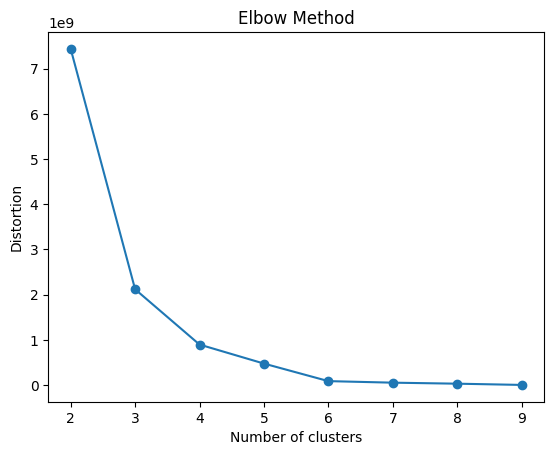

In [9]:
# Đọc dữ liệu
X = dataframe[['Quantity Ordered', 'Price Each', 'Macbook Pro Laptop', 'LG Washing Machine', 'USB-C Charging Cable',
       'AA Batteries (4-pack)', 'Bose SoundSport Headphones',
       'AAA Batteries (4-pack)', 'ThinkPad Laptop', 'Google Phone',
       'Wired Headphones', 'Apple Airpods Headphones',
       'Lightning Charging Cable', 'Vareebadd Phone', '27in FHD Monitor',
       'iPhone', '20in Monitor', '34in Ultrawide Monitor',
       'Flatscreen TV', '27in 4K Gaming Monitor', 'LG Dryer']]
distortions = []
for k in range(2, 10):  # Dùng từ 2 đến 10 cụm
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

# Vẽ đồ thị để chọn số cụm
import matplotlib.pyplot as plt
plt.plot(range(2, 10), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

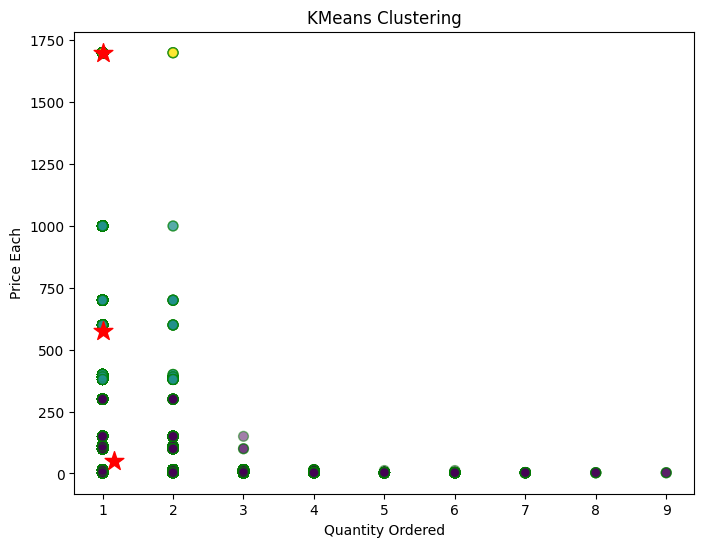

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Xây dựng ma trận dữ liệu đầu vào cho KMeans
X = dataframe[['Quantity Ordered', 'Price Each', 'Macbook Pro Laptop', 'LG Washing Machine', 'USB-C Charging Cable',
       'AA Batteries (4-pack)', 'Bose SoundSport Headphones',
       'AAA Batteries (4-pack)', 'ThinkPad Laptop', 'Google Phone',
       'Wired Headphones', 'Apple Airpods Headphones',
       'Lightning Charging Cable', 'Vareebadd Phone', '27in FHD Monitor',
       'iPhone', '20in Monitor', '34in Ultrawide Monitor',
       'Flatscreen TV', '27in 4K Gaming Monitor', 'LG Dryer']].values


# Khởi tạo và fit model KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters=kmeans.fit_predict(X)

# Gán nhãn cho dữ liệu
dataframe['best seller'] = clusters
#0: low popularity, 1: medium popularity, 2: high popularity
dataframe['best seller'] = dataframe['best seller'].map({0: '0', 1: '1',2:'2'})

plt.figure(figsize=(8,6))
plt.scatter(
    dataframe['Quantity Ordered'],
    dataframe['Price Each'],
    c=clusters,
    s=50,
    alpha=0.5,
    edgecolor='green')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='*',label='Centroids')
plt.xlabel('QuanStity Ordered')
plt.ylabel('Price Each')
plt.title('KMeans Clustering')
plt.show()

In [11]:
print(dataframe[['Product','Price Each','Quantity Ordered', 'best seller']])
#Chắc chắn mới chạy để lưu
dataframe.to_csv("/content/drive/MyDrive/Colab Notebooks/DataSales - Copy.csv", index=False)

                       Product  Price Each  Quantity Ordered best seller
0           Macbook Pro Laptop     1700.00               1.0           2
1           LG Washing Machine      600.00               1.0           1
2         USB-C Charging Cable       11.95               1.0           0
3        AA Batteries (4-pack)        3.84               1.0           0
4         USB-C Charging Cable       11.95               1.0           0
...                        ...         ...               ...         ...
185647      Macbook Pro Laptop     1700.00               1.0           2
185648        27in FHD Monitor      149.99               1.0           0
185649    USB-C Charging Cable       11.95               1.0           0
185650    USB-C Charging Cable       11.95               1.0           0
185651  AAA Batteries (4-pack)        2.99               1.0           0

[185652 rows x 4 columns]


In [12]:
#Calculate silhouette score
silhouette_avg = silhouette_score(X,clusters)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.8037597508661585
